In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('measurements.csv')

In [73]:
# OVERVIEW 
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [75]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [79]:
# df2 = pd.read_excel('measurements2.xlsx')  the same 

In [81]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [103]:
# CLEANING

df.isnull().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [91]:
df['temp_inside'] = df['temp_inside'].str.replace(',', '.')
df['temp_inside'] = pd.to_numeric(df['temp_inside'])

In [99]:
df['temp_inside'].fillna(df['temp_inside'].mean(), inplace=True)
df['specials'] = df['specials'].fillna('No Specials')
df['refill liters'] = df['refill liters'].fillna(0)
df['refill gas'] = df['refill gas'].fillna(0)

/var/folders/jr/tzjk1k550jnfd3ck0z2tl_nr0000gn/T/ipykernel_3443/1485448771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp_inside'].fillna(df['temp_inside'].mean(), inplace=True)


In [101]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,No Specials,E10,0,0,0,45,E10
1,12,"4,2",30,21.5,13,No Specials,E10,0,0,0,0,0
2,"11,2","5,5",38,21.5,15,No Specials,E10,0,0,0,0,0
3,"12,9","3,9",36,21.5,14,No Specials,E10,0,0,0,0,0
4,"18,5","4,5",46,21.5,15,No Specials,E10,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,24.5,18,No Specials,SP98,0,0,0,0,0
384,"16,1","4,3",38,25.0,31,AC,SP98,1,0,0,0,0
385,16,"3,8",45,25.0,19,No Specials,SP98,0,0,0,0,0
386,"15,4","4,6",42,25.0,31,AC,SP98,1,0,0,0,0


In [109]:
df['distance'] = df['distance'].str.replace(',', '.')
df['consume'] = df['consume'].str.replace(',', '.')
df['distance'] = pd.to_numeric(df['distance'])
df['consume'] = pd.to_numeric(df['consume'])
print(df[['consume', 'distance']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   consume   388 non-null    float64
 1   distance  388 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB
None


In [135]:
df.to_csv('cleaned.csv', index=False)

In [113]:
# 1. DISTANCE 

df['efficiency'] = df['consume']/ df['distance']
print(df.groupby('gas_type')['efficiency'].mean())

gas_type
E10     0.436056
SP98    0.506136
Name: efficiency, dtype: float64


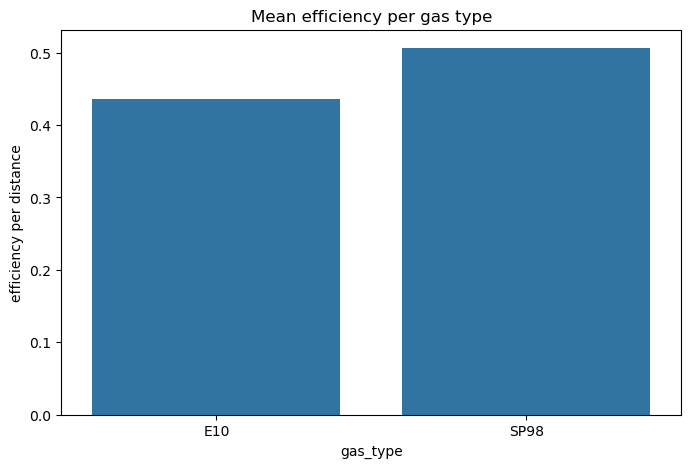

In [119]:
efficiency_by_gas = df.groupby('gas_type')['efficiency'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=efficiency_by_gas, x='gas_type', y='efficiency')
plt.title('Mean efficiency per gas type')
plt.xlabel('gas_type')
plt.ylabel('efficiency per distance')
plt.show()

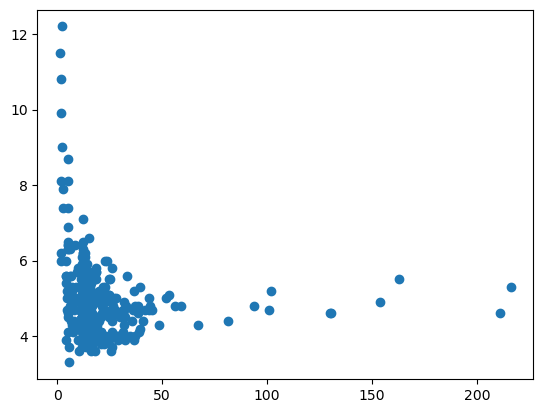

In [139]:
plt.scatter(df['distance'], df['consume'])

In [ ]:
# decreasing consumption with higher distance/ high fuekl consumption for short distance 

In [123]:
# 2. CONSUME

consume_by_gas = df.groupby('gas_type')['consume'].mean().reset_index()
consume_by_gas

,gas_type,consume
0,E10,4.931250
1,SP98,4.899123


In [ ]:
# the mean consumption of SP98 is a little bit lower than for E 10, but as we see earlier the efficiency (consumption per distance) is  lower for E 10

In [131]:
# 3. SPEED

speed = df.groupby('gas_type')['speed'].mean().reset_index()
speed

,gas_type,speed
0,E10,43.506250
1,SP98,40.820175


In [143]:
# 4. TEMP_INSIDE  (almost the same: no insights here)

temp_inside = df.groupby('gas_type')['temp_inside'].mean().reset_index()
temp_inside

,gas_type,temp_inside
0,E10,21.917429
1,SP98,21.938007


In [145]:
# 5. TEMP_OUTSIDE

temp_outside = df.groupby('gas_type')['temp_outside'].mean().reset_index()
temp_outside

,gas_type,temp_outside
0,E10,10.11875
1,SP98,12.22807


In [ ]:
# lower temperatures sometimes increase consumption, so that could explain why the average consumption of E10 is slightly higher 

In [155]:
# 6. SPECIALS

df['specials'].unique()

array(['No Specials', 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [157]:
mean_consume = df.groupby(['specials', 'gas_type'])['consume'].mean()
print(mean_consume)

specials            gas_type
AC                  E10         5.000000
                    SP98        4.620000
AC Sun              E10         4.800000
AC rain             E10         4.500000
                    SP98        5.771429
AC snow             E10         7.100000
AC sun              E10         4.800000
No Specials         E10         4.897692
                    SP98        4.903030
ac                  E10         4.600000
                    SP98        4.700000
ac rain             E10         5.100000
half rain half sun  SP98        4.700000
rain                E10         5.700000
                    SP98        5.305000
snow                SP98        5.166667
sun                 E10         4.350000
                    SP98        4.235294
sun ac              SP98        4.433333
Name: consume, dtype: float64


In [159]:
pivot_table = df.pivot_table(
    values='consume',
    index='specials',
    columns='gas_type',
    aggfunc='mean'
)

print(pivot_table)

gas_type                 E10      SP98
specials                              
AC                  5.000000  4.620000
AC Sun              4.800000       NaN
AC rain             4.500000  5.771429
AC snow             7.100000       NaN
AC sun              4.800000       NaN
No Specials         4.897692  4.903030
ac                  4.600000  4.700000
ac rain             5.100000       NaN
half rain half sun       NaN  4.700000
rain                5.700000  5.305000
snow                     NaN  5.166667
sun                 4.350000  4.235294
sun ac                   NaN  4.433333


In [ ]:
# no big differences here

In [ ]:
# All in all I would recommand to go with the E10 combustible: most efficient